# 첫 캐클 도전기

캐클이라는 것을 오늘 처음 듣게 되어서 많이 부끄럽지만 데이터를 자주 다루는 데이터사이언스나 AI 개발자들에겐 공부하고 좋은 사이트 입니다.

1. 회귀문제이다.

2. 데이터 파일
  
  - train.csv
  
  - test.csv
  
  - sample_submission.csv
 
3. 데이터 필드

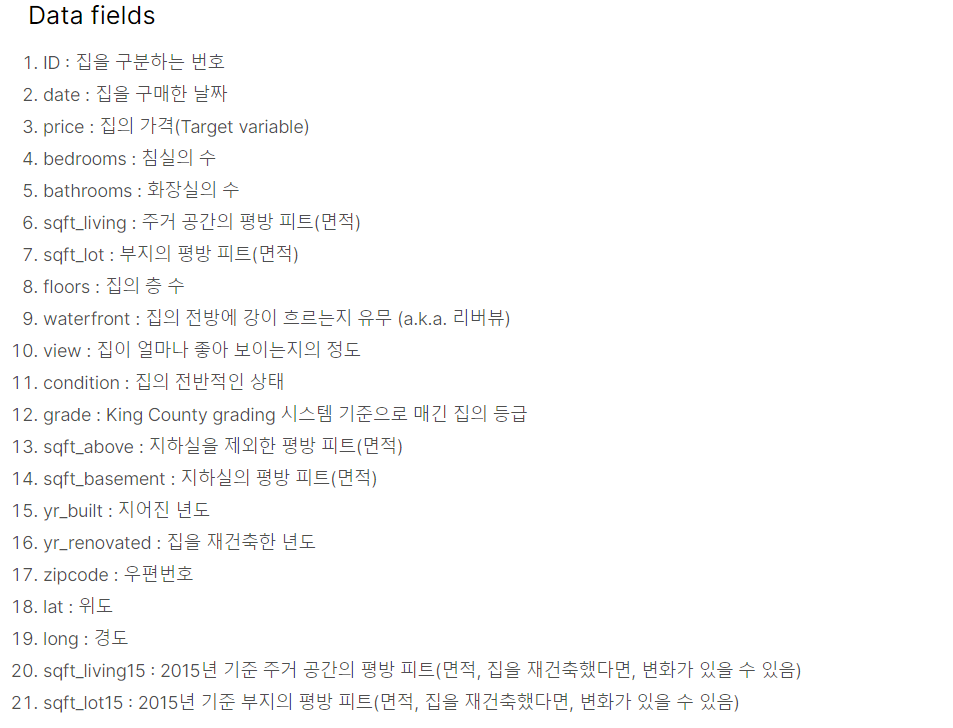


4. 필요한 라이브러리

- xgboost = 1.3.3
- lightgbm =  3.1.1
- missingno = 0.4.2
- scikit-learn



### Baseline

  1. Baseline셋팅하기
  
  2. 라이브러리, 데이터 가져오기
  
   i) 필요한 라이브러리 import 하기
   
   ii) 데이터 경로 지정하기
   
  
  3. 데이터 이해하기
  
   i) 데이터 살펴보기
   
   ii) 데이터를 통해 변수 부르기
   
   iii) 학습데이터에서 라벨 제거하기
   
   iv) 학습데이터와 테스트 데이터 합치기
   
   v) 간단한 전처리

# 데이터 가져오기!!
## 평가문항 2번의 시작!!!!


#### 필요한 라이브러리 import하기

In [97]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('얍💢')

얍💢


#### 데이터 경로 지정

In [26]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(test_data_path)

/aiffel/aiffel/kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/kaggle_kakr_housing/data/test.csv


# 데이터 이해하기

### 간단하게 데이터 확인

In [27]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print("train:{}" .format(train.shape))
print("test:{}". format(test.shape))

train:(15035, 21)
test:(6468, 20)


### 데이터가 잘 형성이 되어있나 상위 5개만 보고 확인하기

In [28]:
train.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### 데이터를 확인해보니 date안에 있는 데이터들이 거슬려서 조정을 하겠습니다.

In [29]:
train['date'] = train['date'].apply(lambda k : k[:8]).astype(int)
train.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


#### 학습 데이터에서 라벨 제거하기

In [30]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### 잘 되었나 확인


In [31]:
train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [32]:

del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [33]:

test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [34]:
train.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20150225,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,20150218,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,20140627,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,20150115,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [35]:
test.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


#### 타겟 데이터 확인

In [36]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

### 중요하고 중요한 데이터 전처리 과정!


1. 결측치 확인하기

결측치가 있다면 흰색 부분이 나왔을거고 없으면 까맣게 나왔을겁니다. 이렇게 미리 결측치를 확인해야 나중에 데이터를 분류하고 판단할 때 모델이 당황하지 않습니다

In [37]:

train.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:>

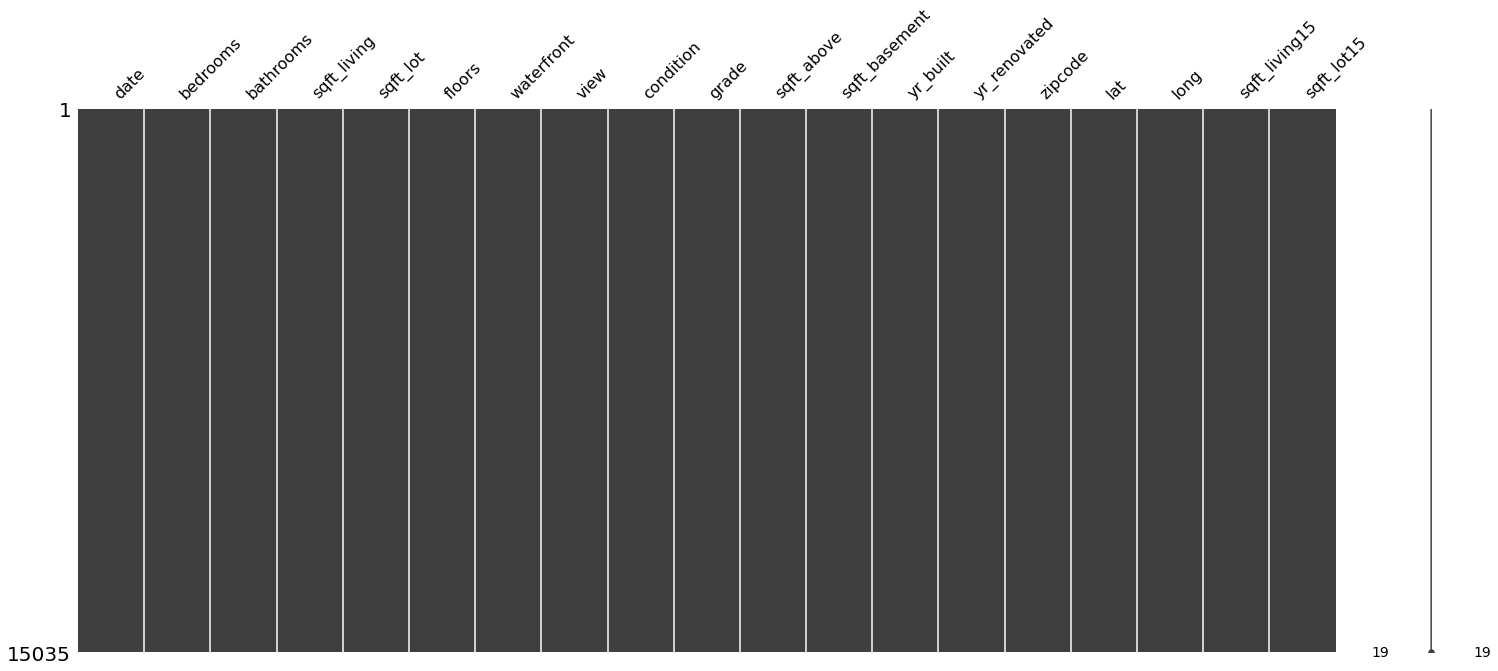

In [38]:
msno.matrix(train)

 - 결측치는 없는 것으로 판명이났다.
 
 - 우리의 목적 결국 집값을 예측하는 것이다.

### 전체 그래프 확인

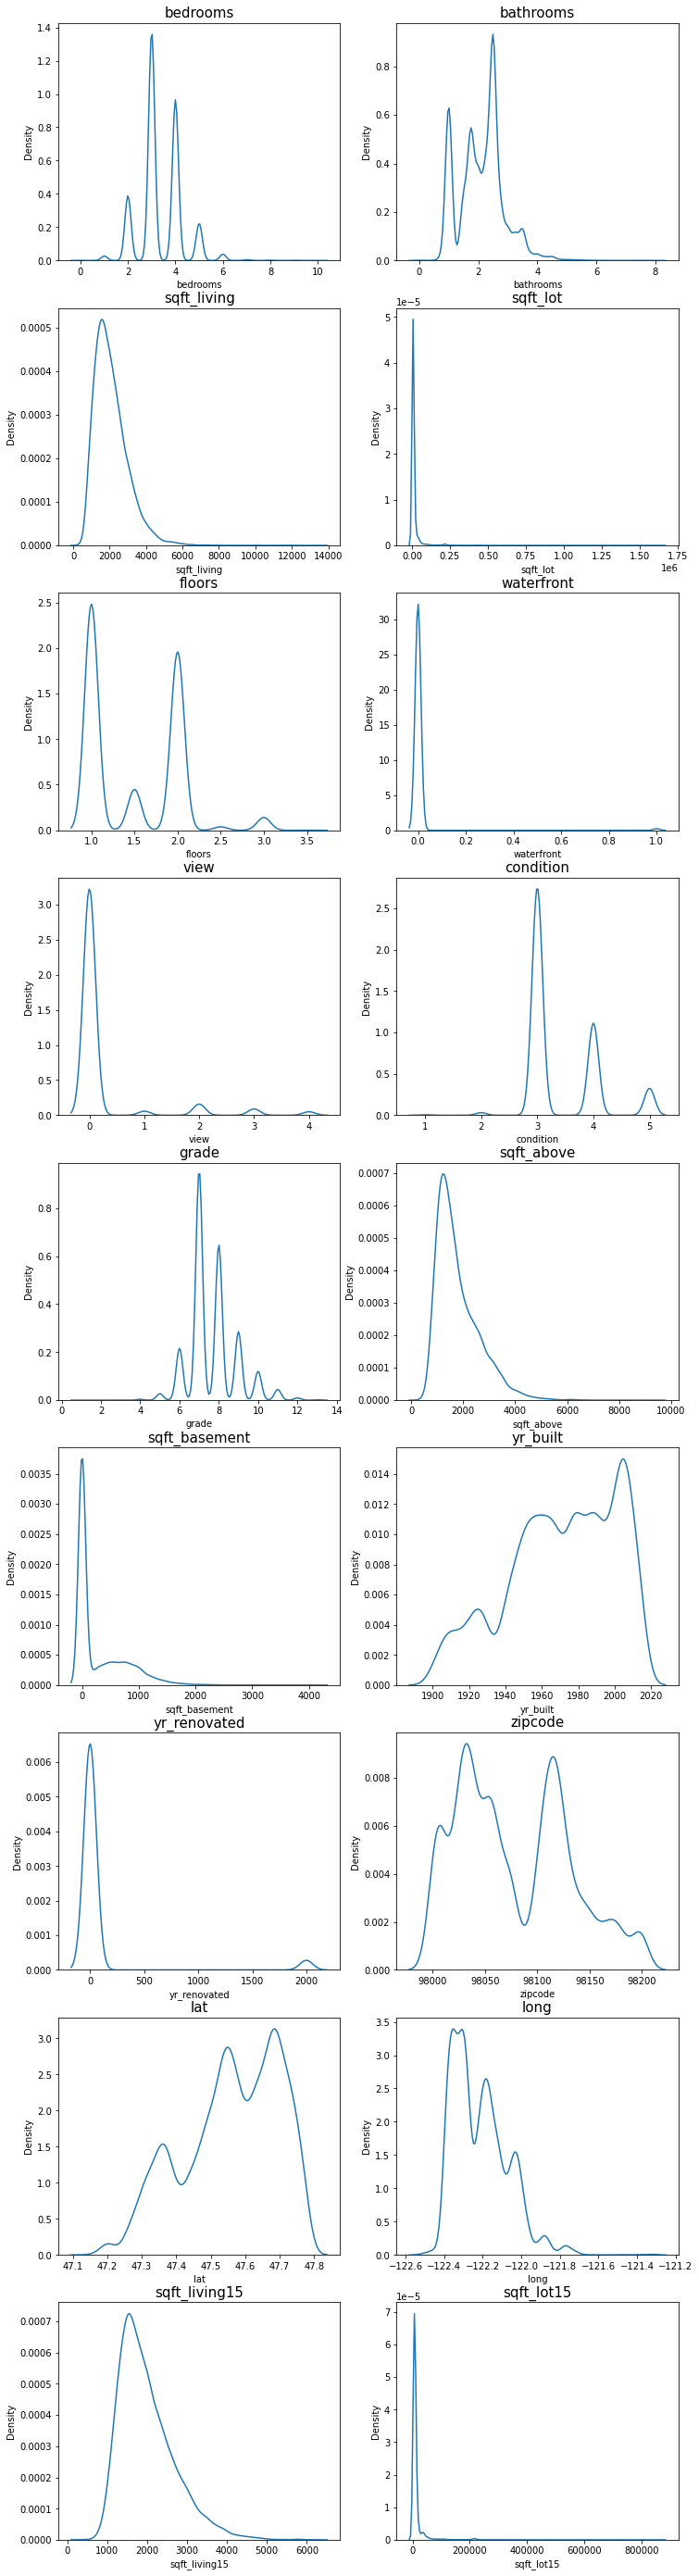

In [39]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   

count = 1
columns = train.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

 - 너무 하나의  값에 몰려 있는 경향이 있어서 정규분포를 통해서 로그 변환을 한다면 지금보다 데이터 분석하기 쉽고 눈에 확 들어올거라고 예상이 됩니다. 모든 함수를 다 하지 않고 필요한 함수인 가격 그래프만 하겠습니다.

일반 그래프


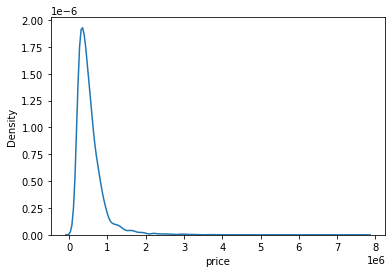

In [40]:
sns.kdeplot(y)
plt.show()

로그로 변환

In [41]:
y = np.log1p(y)
y


0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

그 값을 가지고 정규화하여 그린 그래프

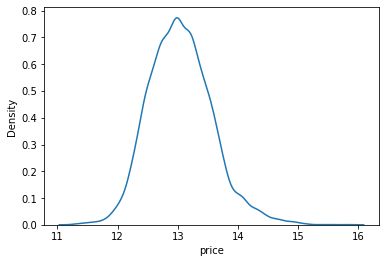

In [42]:
sns.kdeplot(y)
plt.show()

#### 왜 로그 변환(log -scaling)을 하라는가?

그건 수학적인 의미가 가장 클 것입니다. 로그는 x의 범위는 작은 반면에 상대적으로 y의 범위는 매우 큽니다.

그래서 x값이 0에 가까워지면 y값은 매우 크게 되고

반대로 x값이 점점 커지만 기울기가 급격히 작아져서 x와 y값의 차이가 나지 않아 비교적 작은 y값의 모여있게 되는 성질을 같게 되어 한쪽으로 치우쳐 분포된 그래프 조차도

위의 그래프 상황처럼 정규분포 모양으로 퍼지게 될 수 있는 것입니다.

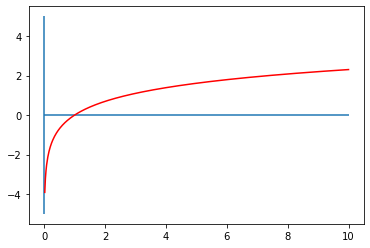

In [43]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

실수, 정수 자료형만 들어있으므로 분석하는데 문제는
없을 것으로 예측이됩니다.

# 모델링


### 모델링 들어가기 전 기초 개념 탐구

- baseline: 모델 성능을 비교하기 위해 기준이 되는 모델


- Ensemble: 여러개의 알고리즘을 사용하여 그 예측을 결합보다 정확한 최종 예측 도출


- Voting: 여러 모델 분류 후 다수결로 통해서 최종 결과 선택을 하는 것으로 분류문제에 잘 쓰인다.


- Averaging: 모델이 계산한 실수값들의 평균 혹은 가중 평균하여 사용하는 것으로 회귀 문제에 사용이 된다.그로므로 이번 익스 때 사용할 주된 개념이다.


- 블랜딩(blending) : baseline커널에서 여러 모델 섞기


- RMSE 와 Cross-Validation score의 비교하기

- Average Blending: 산술 평균하여 모델 만든다

-  Cross Validation: 교차 검증을 통해 모델 성능 평가
   
-  Make Submission File

  cross_val_score()함수는 회귀모델을 할 경우 R^2점수를 반환하고 그 값이 1에 가까울 수록 모델이 잘 학습이 된 것입니다. 그리고 상대적 성능이기 때문에 직관적으로 파악 가능
   
   
   ![](https://images.velog.io/images/qsdcfd/post/d1c3d658-0497-4e40-9189-26a8b7592205/image.png)
   
  

### 다양한 함수를 통해 실험하기

1. 훈련 데이터아 검증 데이터 나누기
  
  :train_test_split 함수 이용
  
2. RMSE 점수 계산
  
  - 정의 : 평균 제곱근 오차라는 뜻을 가진 것으로 추정 값 또는 모델이 예측한 값과 실제가 차이가 있을 때 사용
  
  - mean_squared_error 이용
  
  -  y_test나 y_pred위에서 np.log1p()로 변환이 되기 때문에 np.expm1() 추가해야 함
  
  - random_state : 특정값 고정
  
  
  
3. 여러 가지 모델 이용

  - XGBRegressor
  
  - LGBMRegressor
  
  - GradientBoostingRegressor
  
  - RandomForestRegressor
  
  

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('RMSE 값 준비 완료!')

RMSE 값 준비 완료!


In [47]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

#### Average Blending

In [55]:



gboost = GradientBoostingRegressor(random_state=2021)
xgboost = XGBRegressor(random_state=2021)
lightgbm = LGBMRegressor(random_state=2021)
rdforest = RandomForestRegressor(random_state=2021)
models = [gboost, xgboost, lightgbm, rdforest]

In [56]:
gboost.__class__.__name__

'GradientBoostingRegressor'

#### 훈련 데이터 셋과 테스트 데이텟 분리 후 RMSE계산

In [57]:

df = {}

for model in models:
    
    model_name = model.__class__.__name__

    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=2021, test_size=0.2)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    df[model_name] = rmse(y_test, y_pred)
    
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 136310.55386176528,
 'XGBRegressor': 131075.32713281445,
 'LGBMRegressor': 128586.70033151371,
 'RandomForestRegressor': 136973.1337892089}

In [58]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=2021, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

#### 눈으로 보기 쉽게  내림차순 하여 표로 시각화

In [59]:

get_scores(models, train, y)

,RMSE
RandomForestRegressor,136973.133789
GradientBoostingRegressor,136310.553862
XGBRegressor,131075.327133
LGBMRegressor,128586.700332


## 하이퍼파라미터 튜닝하기

  i) 파라미터란? 
     
   모델 파라미터와 하이퍼 파라미터로 나뉘는데요 전자는 모델이 학습하면서 최적화가 되어야하는 것을 의미하고 후자는 모델이 학습하기 위해 미리 넣어주는 파라미터입니다.
     
  ii) 내 입맛대로 데이터 재구성하기.
  
   - 삭제
   
   - 추가
   
   - 기타 등등

### 그리티 탐색 (Grid Search)

   : GridSearchCV를 통해서 탐색하고자 하는 하이퍼파라미터 와 시도해볼 값을 지정하기만 하면 되는 것입니다. 
   
   그러면 교차 검증을 통해 평가 가능.  
   
   사람이 지정한 범주 내에서는 최적을 찾지만 그것이 무조건 최적인지는 의문이다.
   
   적은 수 탐색에 유리
   
   반복횟수로 컴퓨터 자원 제어

In [53]:

from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {
    'n_estimators': [50, 150],
    'max_depth': [1, 11],
}

In [60]:

model = LGBMRegressor(random_state=2021)

In [61]:

grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    4.6s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2021), n_jobs=5,
             param_grid={'max_depth': [1, 11], 'n_estimators': [50, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [62]:

grid_model.cv_results_

{'mean_fit_time': array([0.23990455, 0.32712984, 0.46271162, 1.14252167]),
 'std_fit_time': array([0.05658307, 0.08216713, 0.04155051, 0.15305868]),
 'mean_score_time': array([0.01673069, 0.01952748, 0.02612367, 0.08038573]),
 'std_score_time': array([0.01458827, 0.00342536, 0.0092715 , 0.03885585]),
 'param_max_depth': masked_array(data=[1, 1, 11, 11],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 150, 50, 150],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 150},
  {'max_depth': 11, 'n_estimators': 50},
  {'max_depth': 11, 'n_estimators': 150}],
 'split0_test_score': array([-0.0756974 , -0.04827215, -0.02866785, -0.02582918]),
 'split1_test_score': array([-0.07666447, -0.05106487, -0.03042507, -0.02753529]),
 'split2_test_score': array([-0.07354904

In [64]:
params = grid_model.cv_results_['params']
params


[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 150},
 {'max_depth': 11, 'n_estimators': 50},
 {'max_depth': 11, 'n_estimators': 150}]

In [65]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.04844955, -0.02930849, -0.02651007])

In [66]:
results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.073394
1,1,150,-0.048450
2,11,50,-0.029308
3,11,150,-0.026510


In [67]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073394,0.270914
1,1,150,-0.048450,0.220113
2,11,50,-0.029308,0.171197
3,11,150,-0.026510,0.162819


In [68]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073394,0.270914
1,1,150,-0.048450,0.220113
2,11,50,-0.029308,0.171197
3,11,150,-0.026510,0.162819


In [69]:
results.sort_values('RMSLE')


,max_depth,n_estimators,score,RMSLE
3,11,150,-0.026510,0.162819
2,11,50,-0.029308,0.171197
1,1,150,-0.048450,0.220113
0,1,50,-0.073394,0.270914


하이퍼파라미터 설정

In [70]:
model = LGBMRegressor(max_depth=11, n_estimators=150, random_state=2021)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.12560243, 13.09628793, 14.13113036, ..., 13.01704247,
       12.75557202, 13.00145069])

In [71]:
prediction = np.expm1(prediction)
prediction

array([ 501621.15408975,  487129.78854802, 1371107.86874033, ...,
        450016.82364051,  346476.10333105,  443054.66217101])

In [73]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [74]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.016212e+05
1,15036,4.871298e+05
2,15037,1.371108e+06
3,15038,2.816628e+05
4,15039,3.293298e+05


In [75]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.1643')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.1643.csv


### 다양한 하이퍼 파라미터에 변화를 주기


- param_grid : 탐색할 파리미터 종류

- scoring :  성능 평가 지표

- cv : cross validation을 수행

- verbose :  메세지의 양

- n_jobs : 사용할 CPU의 개수
  

In [106]:

param_grid = {
    'n_estimators': [200, 300],

    'max_depth': [10, 15, 20],
}

model = LGBMRegressor(random_state=2021)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:   12.2s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,max_depth,n_estimators,score,RMSLE
5,20,300,-0.026028,0.161331
4,20,200,-0.026128,0.161643
3,15,300,-0.026160,0.161741
2,15,200,-0.026220,0.161925
1,10,300,-0.026261,0.162052
0,10,200,-0.026338,0.162288


In [108]:
model = LGBMRegressor(max_depth=20, n_estimators=300, random_state=2021)
model.fit(train, y)
prediction = model.predict(test)
prediction

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([13.13544777, 13.13655717, 14.1650178 , ..., 13.02067447,
       12.75126678, 13.01138965])

In [109]:
prediction = np.expm1(prediction)
prediction

array([ 506584.18475054,  507146.49984578, 1418367.47049527, ...,
        451654.25932566,  344987.64378839,  447480.12956772])

### Make Submission File


#### 예측값 생성

In [110]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [111]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.065842e+05
1,15036,5.071465e+05
2,15037,1.418367e+06
3,15038,2.742945e+05
4,15039,3.317907e+05


## 평가문항 1번

In [112]:

submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.1615279')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.1615279.csv


In [113]:

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [114]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.1615279')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.1615279.csv saved!


## 평가문항 3번

과적합이 일어난 것을 알게되어. 하이퍼파라미터인 max_depth를 절반 값보단 큰 20으로 줄였을 때 11만 보다 작은 10만 언저리의 값이 나오게 되어서 다시 한 번 모든 모델엔 적합한 하이퍼파라미터가 있구나를 깨닫게 된 좋은 공부였습니다.

< max_depth = 20>

![image](https://user-images.githubusercontent.com/90362666/136971580-a401c85f-0c27-40ee-85e6-8e26cd073731.png)

< max_depth = 35>

![image](https://user-images.githubusercontent.com/90362666/136973150-b3e45922-acd3-455e-828d-54972f2f4e25.png)


# 프로젝트 회고

1, 느낀점 : 앞에서 언급했던 것처럼 캐클에 대해서 너무 많이 몰라서 시작부터 코드를 치지 않고 유튜브와 블로그에서  캐클을 어떻게 사용하고 어떤 방식으로 공부를 하고 쓰이는 지에 대해서 먼저 보았습니다. 

그러다보니 왜 사람들이 모델학습을 시키기 전에 데이터를 전처리하고 이상치나 결측치 값을 신중하게 찾는 지 알게 되어 저 또한 시간에 걸쳐서 찾은 것 같고 그로인해서 조금은 빠르게 데이터 처리를 할 수 있었습니다. 

다 마무리하고 제출을 뭘로 해야할지 몰라서 처음에 ipynb로 했다가 제출이 되지 않아서 상민퍼실님께 질문을 드린다음에 블로그를 찾아보니 submission_csv파일을 넣어야 한다는 글귀를 보고 찾아서 넣었더니 실행 결과가 되어서 좋았지만 11만이 넘어서 무슨 문제가 있나 하고  하이퍼파라미터를 수정했습니다.







2. 하이퍼파라미터 수정.

  처음에는 max_depth =  35를 했습니다. 다다익선이라고 생각을 했습니다 허나 11만이 넘었고 더 늘려서 50까지 했을 때는 12만이 되었습니다. 그래서 저는 생각을 했습니다. 이건 과적합이 일어난 것이라고요.











3. 과적합, 도대체 넌.

항상 신기하고 궁금한 왜 하이퍼파라미터를 계속 올려도 결과가 좋아지는 한계치가 있고 그것을 넘어가면 과적합 현상이 일어난다 그러면 과적합은 무엇일까요?

과적합은 말 그대로 학습 데이터를 너무 과하게 한다는 뜻으로 학습데이터를 늘리면 부분 오차가 감소하지만 실제 데이터에서는 오차가 증가합니다.





![image](https://user-images.githubusercontent.com/90362666/136971659-b19ea5b9-943b-4a66-8d25-a112b8f8d1e5.png)




